# **Caso Real: Procesamiento en Receptor**

# Importar módulos

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.signal import lfilter, correlate, welch
from scipy.stats import norm

# **Ruido blanco Gaussiano y dispersión en fribra óptica**


In [8]:
def filtro_dispersivo(longitud, beta, fs):
    """
    Simula un filtro de dispersión cromática en fibra óptica.
    longitud: longitud de la fibra (km)
    beta: parámetro de dispersión (ps^2/km)
    fs: frecuencia de muestreo (Hz)
    """
    N = 1024
    f = np.fft.fftfreq(N, d=1/fs)
    H = np.exp(-1j * np.pi * beta * longitud * (f**2))
    return H

def graficar_autocorr_psd(mu, sigma, fs=100e9):
  """
  Grafica la autocorrelación y la densidad espectral de potencia (PSD) de una señal
  de ruido blanco gaussiano (AWGN) y su versión filtrada por un sistema exponencialmente
  decreciente.

  Parámetros:
  mu : Media de la señal de ruido blanco gaussiano.
  sigma : Desviación estándar de la señal de ruido blanco gaussiano.
  fs : Frecuencia de muestreo utilizada para el cálculo del PSD.

  Retorna:
  La función muestra las gráficas generadas.
  """
  A = 10000
  x = np.random.normal(mu, sigma, A) # Señal de AWGN mu=0, sigma=1
  h = filtro_dispersivo(10, 1e-26, fs=100e9)
  y = lfilter(h, [1], x)
  lags = np.arange(-A + 1, A)

  autocorr_x = correlate(x, x, mode='full') / A
  f2, Pxx2 = welch(x, fs)

  autocorr_y = correlate(y, y, mode='full') / A
  f1, Pxx1 = welch(y, fs)

  # Gráfico de autocorrelación
  plt.figure(figsize=(22, 4))
  plt.subplot(1, 4, 1)
  plt.plot(lags, autocorr_x,color='b')
  plt.title(f"Autocorrelación: entrada (x)")
  plt.xlabel("Frecuencia [Hz]")
  plt.ylabel("Amplitud")
  plt.subplot(1, 4, 2)
  plt.plot(lags, autocorr_y,color='c')
  plt.title(f"Autocorrelación: salida (y)")
  plt.xlabel("Frecuencia [Hz]")
  plt.subplot(1, 4, 3)
  plt.semilogy(f2, Pxx2,c='g')
  plt.title(f"PSD: Entrada (x)")
  plt.xlabel("Frecuencia [Hz]")
  plt.subplot(1, 4, 4)
  plt.semilogy(f1, Pxx1,c='purple')
  plt.title(f"PSD: Salida (y)")
  plt.xlabel("Frecuencia [Hz]")
  plt.grid(True)

  plt.suptitle(f"mu={mu}, sigma={sigma}")
  plt.show()

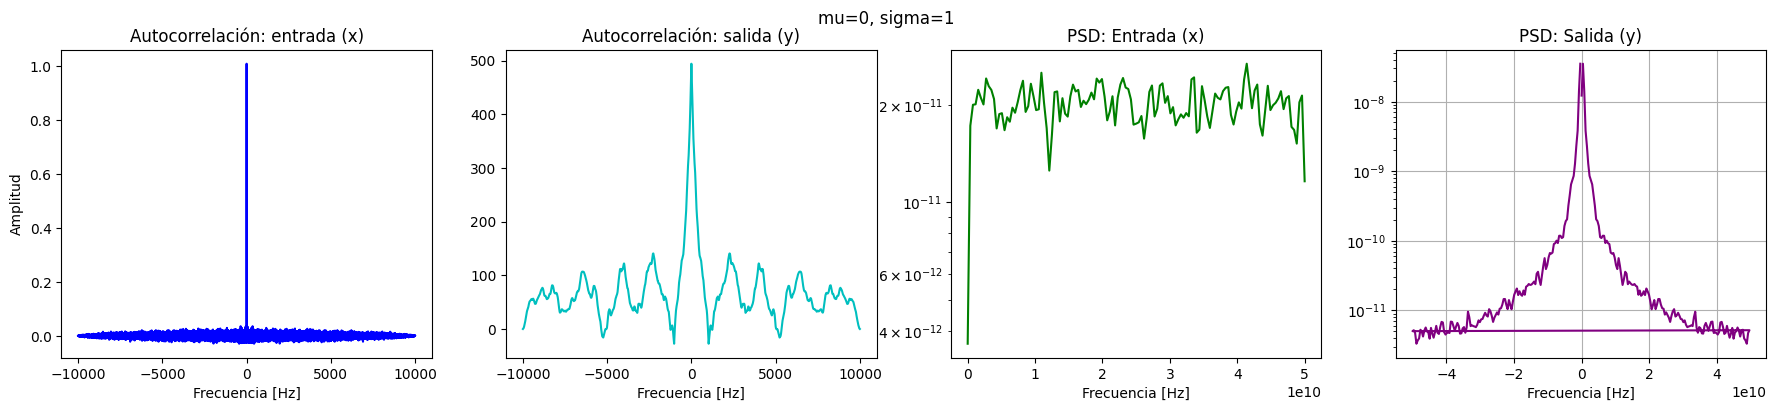

In [9]:
A = 10000
a = 2
G = 3

# Genere ruido blanco gaussiano (potencia unitaria).
x = np.random.normal(0, 1, A)

X = np.fft.fft(x, 1024)
# Filtro que genera dispersión
H = filtro_dispersivo(10, 1e-26, fs=100e9)
Y = X * H
y_dispersada = np.fft.ifft(Y).real

# Gráfica de autocorrelación y PSD
graficar_autocorr_psd(0,1)